*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [1]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [2]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

H1_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H1_dataframe.csv')
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [3]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1


In [4]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1


In [5]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1


In [6]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1


In [7]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1,positive


In [8]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'day_of_week', 'time_of_day']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1,positive,Sunday,Afternoon


### Checking, if the final combined dataframe looks fine

In [9]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1,positive,Sunday,Afternoon
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,41,3,1,positive,Sunday,Afternoon
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,34,2,1,positive,Sunday,Afternoon
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,618,1,1,neutral,Sunday,Evening
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,20,2,0,positive,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,...,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,22,1,0,positive,Saturday,Evening
18289,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,...,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,9,1,1,neutral,Saturday,Evening
18290,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,...,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,794,2,1,neutral,Sunday,Morning
18291,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,...,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,69,1,1,positive,Saturday,Evening


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [10]:
from pymer4.models import Lmer

In [11]:
# Define the formula for the multilevel regression model with varying slopes
formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type|followers) + (1 + has_emoji|followers) + (1 + sentiment|followers) + (1 + day_of_week|followers) + (1 + time_of_day|followers)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: weighted_engagement~post_type+has_emoji+sentiment+day_of_week+time_of_day+(1+post_type|followers)+(1+has_emoji|followers)+(1+sentiment|followers)+(1+day_of_week|followers)+(1+time_of_day|followers)

Family: gaussian	 Inference: parametric

Number of observations: 18293	 Groups: {'followers': 53.0}

Log-likelihood: -176336.357 	 AIC: 352792.714

Random effects:

                             Name           Var       Std
followers             (Intercept)  1.042077e+06  1020.822
followers               post_type  6.137700e+05   783.435
followers.1           (Intercept)  0.000000e+00     0.000
followers.1             has_emoji  1.245303e+05   352.889
followers.2           (Intercept)  3.670333e+04   191.581
followers.2      sentimentneutral  8.535069e+03    92.385
followers.2     sentimentpositive  1.292141e+05   359.464
followers.3           (Intercept)  1.812211e+06  1346.184
followers.3 

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),542.413,-30.345,1115.172,292.229,82.826,1.856,0.067,.
post_type,6.880,-240.027,253.786,125.975,61.628,0.055,0.957,
has_emoji,-43.246,-215.465,128.973,87.868,51.981,-0.492,0.625,
sentimentneutral,76.106,-187.905,340.118,134.702,2189.595,0.565,0.572,
sentimentpositive,81.945,-179.011,342.900,133.143,90.967,0.615,0.540,
day_of_weekMonday,-219.125,-652.889,214.640,221.313,46.633,-0.990,0.327,
day_of_weekSaturday,-280.953,-647.107,85.202,186.817,38.731,-1.504,0.141,
day_of_weekSunday,-144.183,-564.269,275.903,214.333,42.290,-0.673,0.505,
day_of_weekThursday,-160.944,-571.776,249.889,209.612,52.562,-0.768,0.446,
day_of_weekTuesday,-196.418,-639.346,246.510,225.988,48.625,-0.869,0.389,


In [12]:
# Extract fixed effects
fixed_effects = model.coefs

fixed_effects

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),542.413390,-30.344787,1115.171568,292.228930,82.825610,1.856125,0.066992,.
post_type,6.879510,-240.027382,253.786402,125.975219,61.628061,0.054610,0.956626,
has_emoji,-43.246463,-215.465470,128.972545,87.868455,51.981055,-0.492173,0.624669,
sentimentneutral,76.106175,-187.905362,340.117711,134.702239,2189.595024,0.564996,0.572135,
sentimentpositive,81.944640,-179.010529,342.899809,133.142839,90.967416,0.615464,0.539785,
day_of_weekMonday,-219.124588,-652.889356,214.640181,221.312622,46.632866,-0.990113,0.327229,
day_of_weekSaturday,-280.952519,-647.106925,85.201887,186.816905,38.731063,-1.503892,0.140720,
day_of_weekSunday,-144.182613,-564.268531,275.903305,214.333488,42.290186,-0.672702,0.504796,
day_of_weekThursday,-160.943591,-571.775923,249.888742,209.612184,52.562213,-0.767816,0.446032,
day_of_weekTuesday,-196.418142,-639.346313,246.510029,225.987913,48.624877,-0.869153,0.389033,


In [13]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
model.fixef.head(5)

,(Intercept),post_type,has_emoji,sentimentneutral,sentimentpositive,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,time_of_dayEvening,time_of_dayMorning
66,1242.486142,-100.575359,55.890722,49.244808,186.459879,237.128777,151.133753,181.201190,174.117042,295.992124,91.593769,85.504409,3.739588
2300,321.862267,40.732122,-58.730231,82.670038,56.405218,16.387772,-31.001050,-7.937498,-20.937824,65.964425,-10.860711,-77.673366,-70.900967
4000,164.761239,64.845716,-42.497505,84.098541,50.847038,15.036017,-21.090373,-22.088259,-35.630520,67.917808,-12.534208,-118.768318,-23.823802
15000,835.719682,-38.140370,-49.126435,74.117951,89.680646,33.286333,-11.095090,-0.484550,-13.305456,85.392084,-3.583158,-88.423696,-28.359381
17000,846.972082,-39.867511,-43.710473,71.244944,100.859263,-4.194486,-47.316836,-26.358790,-39.941329,44.719568,-20.476996,-125.893459,-20.910429


In [14]:
# Get population level coefficients
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),542.413390,-30.344787,1115.171568,292.228930,82.825610,1.856125,0.066992,.
post_type,6.879510,-240.027382,253.786402,125.975219,61.628061,0.054610,0.956626,
has_emoji,-43.246463,-215.465470,128.972545,87.868455,51.981055,-0.492173,0.624669,
sentimentneutral,76.106175,-187.905362,340.117711,134.702239,2189.595024,0.564996,0.572135,
sentimentpositive,81.944640,-179.010529,342.899809,133.142839,90.967416,0.615464,0.539785,
day_of_weekMonday,-219.124588,-652.889356,214.640181,221.312622,46.632866,-0.990113,0.327229,
day_of_weekSaturday,-280.952519,-647.106925,85.201887,186.816905,38.731063,-1.503892,0.140720,
day_of_weekSunday,-144.182613,-564.268531,275.903305,214.333488,42.290186,-0.672702,0.504796,
day_of_weekThursday,-160.943591,-571.775923,249.888742,209.612184,52.562213,-0.767816,0.446032,
day_of_weekTuesday,-196.418142,-639.346313,246.510029,225.987913,48.624877,-0.869153,0.389033,


### Get group level deviates from population level coefficients (i.e. rfx)

In [15]:
# Extract random effects
random_effects = model.ranef

random_effects

,X.Intercept.,post_type,X.Intercept..1,has_emoji,X.Intercept..2,sentimentneutral,sentimentpositive,X.Intercept..3,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,X.Intercept..4,time_of_dayEvening,time_of_dayMorning
66,140.014550,-107.454869,0.0,99.137185,-55.702841,-26.861367,104.515239,-552.760614,456.253365,432.086272,325.383803,335.060632,492.410266,206.487136,-83.996110,-577.647195,-106.331453
2300,-44.110225,33.852612,0.0,-15.483768,13.611588,6.563863,-25.539423,-333.848779,235.512360,249.951469,136.245115,140.005767,262.382567,104.032656,-141.834052,-740.824970,-180.972007
4000,-75.530430,57.966206,0.0,0.748958,16.573896,7.992366,-31.097602,-352.386035,234.160604,259.862146,122.094354,125.313070,264.335950,102.359159,-106.022696,-781.919922,-133.894843
15000,58.661258,-45.019880,0.0,-5.879972,-4.123012,-1.988224,7.736006,-361.357193,252.410921,269.857429,143.698063,147.638135,281.810226,111.310209,-109.350484,-751.575300,-138.430421
17000,60.911738,-46.747022,0.0,-0.464010,-10.080810,-4.861230,18.914622,-314.639127,214.930102,233.635683,117.823823,121.002261,241.137710,94.416371,-103.827763,-789.045063,-130.981469
22000,-73.329134,56.276811,0.0,-1.140237,3.803725,1.834256,-7.136930,-346.210195,279.387590,268.874478,194.199377,199.928432,302.835094,126.036176,-110.356596,-700.391761,-140.056527
23000,25.548121,-19.607036,0.0,-71.004982,-9.812084,-4.731644,18.410411,-321.210187,225.356203,240.147896,129.220537,132.774285,251.365036,99.453859,-118.925461,-703.994799,-151.239545
26000,-53.618344,41.149665,0.0,-5.925341,18.245971,8.798684,-34.234917,-330.360829,230.048636,246.514144,130.301792,133.866894,257.015493,101.395134,-141.111452,-731.423544,-180.084146
29000,-11.118710,8.533108,0.0,34.734592,35.805036,17.266125,-67.180989,-325.511184,195.383849,234.290829,81.299760,83.184587,225.886502,83.751917,-108.668503,-476.595596,-139.206711
35000,-11.521475,8.842212,0.0,0.000000,9.047917,4.363142,-16.976606,-260.511528,188.381033,196.310317,113.245308,116.419411,208.770040,83.556849,-81.368937,-757.725998,-101.803701


<Axes: xlabel='Estimate'>

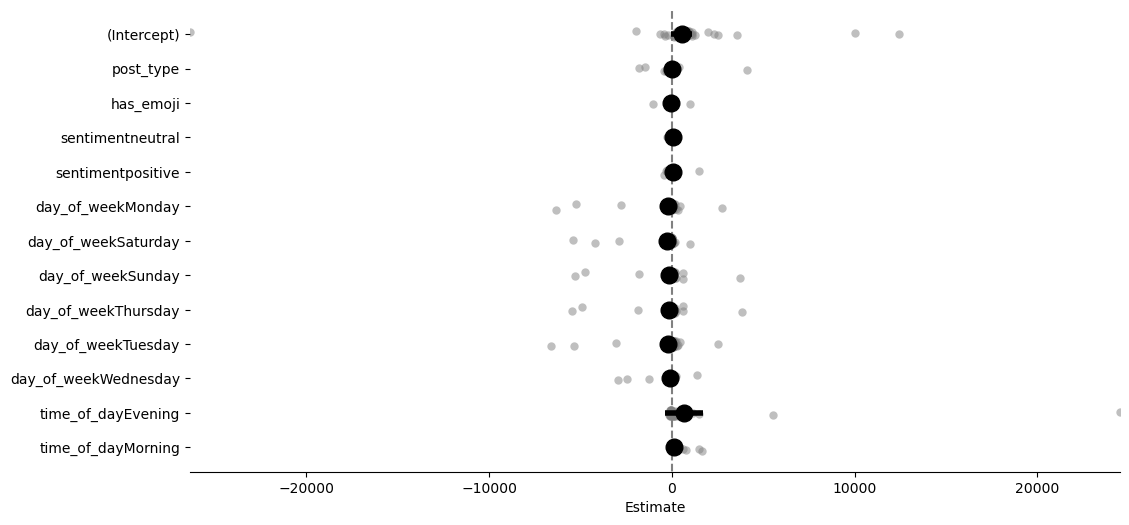

In [16]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

In [17]:
# Create a DataFrame to store the results
result_df = pd.DataFrame()

# Populate the DataFrame with fixed effects
result_df['Main effects Estimate'] = fixed_effects['Estimate'].values
result_df['SE'] = fixed_effects['SE'].values

# Populate the DataFrame with random effects
for group, effect in random_effects.items():
    result_df[f'Random effect {group}'] = effect

# Add Intercept row
result_df.loc['(Intercept)'] = [fixed_effects.loc['(Intercept)', 'Estimate'], fixed_effects.loc['(Intercept)', 'SE']] + [0] * (len(random_effects) - 1)

# Reorder columns
result_df = result_df[['Main effects Estimate', 'SE'] + [col for col in result_df.columns if col not in ['Main effects Estimate', 'SE']]]

# Print the results table
print(result_df)

ValueError: cannot set a row with mismatched columns

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("sentiment", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
